In [3]:
import sys
import os
from os import path
import glob
import json
import re

import numpy as np
import pandas as pd
from tqdm import tqdm
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

# Local imports (hacky approach)
if ".." not in sys.path: sys.path.append("..")
from saccade_config import *

In [4]:
boc = BrainObservatoryCache(manifest_file=BRAIN_OBSERVATORY_CACHE_MANIFEST_FILE)

In [9]:
for exp in boc.get_ophys_experiments():
    print(exp)
    break

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

array([    0, 39704, 39704, 39704, 39704])

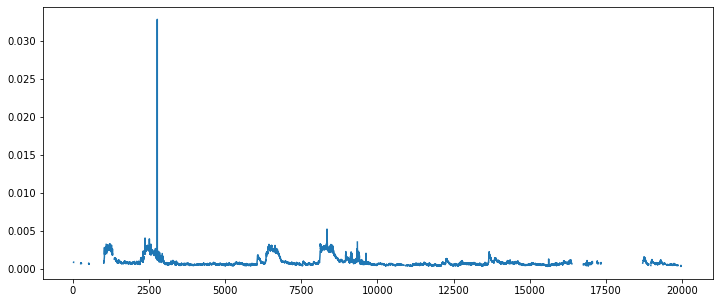

In [30]:
data = np.load("/Users/chase/Library/CloudStorage/OneDrive-AllenInstitute/packaged_viscoding_eye_tracking/data/552410386.npy")

plt.figure(figsize=(12, 5))
plt.plot(data[20000:40000, 2])
np.isnan(data).sum(axis=0)


In [14]:
np.isnan(data).sum(axis=0)

array([    0, 46319, 46319, 46319, 46319])

In [20]:
%matplotlib inline

In [16]:
import matplotlib.pyplot as plt

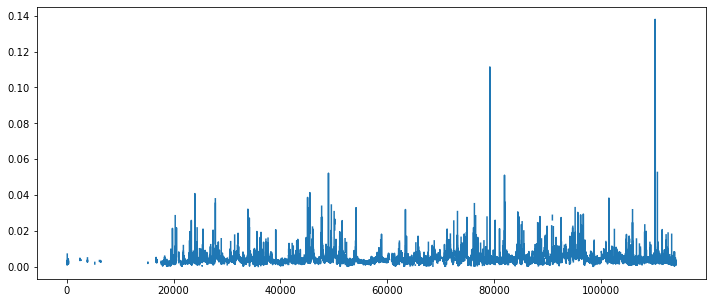